# Exercici 1







Crea almenys dos models de classificació diferents per intentar predir millor les classes de l'arxiu adjunt.

En primer lloc carreguem el dataset i mostrem els primers resultats.

In [8]:
import pandas as pd

df_wine = pd.read_csv('wineData.txt', header=None)

df_wine.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.5,0.95,2.26,625
48,1,14.10,2.02,2.40,18.8,103,2.75,2.92,0.32,2.38,6.2,1.07,2.75,1060
87,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.6,1.36,3.21,562
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.0,0.97,2.44,466
91,2,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.6,1.05,2.65,450


Passem ara a veure quin tipus de variables tenim en el dataframe.

In [9]:
df_wine.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5       int64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13      int64
dtype: object

Ara inclourem una descripció de la informació que tenim en l'arxiu wineNames, referents als 13 components del vi, els quals són les variables (columnes del dataframe).

 El dataset s'anomena "Wine recognition data". Els atributs del vi són els següents:
 
 <ol>
	1. Alcohol <br>
 	2. Malic acid <br>
 	3. Ash <br>
	4. Alcalinity of ash <br>
 	5. Magnesium <br>
	6. Total phenols <br>
 	7. Flavanoids <br>
 	8. Nonflavanoid phenols <br>
 	9. Proanthocyanins <br>
	10. Color intensity <br>
 	11. Hue <br>
 	12. OD280/OD315 of diluted wines <br>
 	13. Proline            
    
  </ol>

Com veiem, tenim 13 variables però 14 columnes en el dataframe. La primera d'elles conté el tipus de vi, que s'ha classificat entres classes diferents: 1, 2, i 3. 

Ara volem donar el seu nom a cadascuna de les columnes, ja que el nostre dataframe no té encapçalament (header)

In [10]:
nom_cols = ['Wine_type', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 
            'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315_diluted_wines', 'Proline']

df_wine.columns = nom_cols

Ara tornem a mostrar el dataframe amb el nom de les columnes.

In [11]:
df_wine.sample(5)

,Wine_type,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_diluted_wines,Proline
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630
66,2,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502
20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560
116,2,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495


Un cop ja tenim totes les columnes amb el seu nom corresponent, anem a fer una descripció de les variables:
    
- Wine_type : variable numèrica discreta
- Alcohol: variable numèrica contínua
- Malic_acid: variable numèrica contínua
- Ash: variable numèrica contínua
- Alcalinity_of_ash: variable numèrica contínua
- Magnesium: variable numèrica discreta
- Total_phenols: variable numèrica contínua
- Flavanoids: variable numèrica contínua
- Nonflavanoid_phenols: variable numèrica contínua
- Proanthocyanins: variable numèrica contínua
- Color_intensity: variable numèrica contínua
- Hue: variable numèrica contínua
- O280_OD315_ dilueted_wines: variable numèrica contínua
- Proline: variable numèrica discreta

Ara mirarem si tenim valors NaN (not a number).

In [12]:
df_wine.isna().sum() # Busquem si hi ha valors NaN i els comptem, per cada variable

Wine_type                    0
Alcohol                      0
Malic_acid                   0
Ash                          0
Alcalinity_of_ash            0
Magnesium                    0
Total_phenols                0
Flavanoids                   0
Nonflavanoid_phenols         0
Proanthocyanins              0
Color_intensity              0
Hue                          0
OD280_OD315_diluted_wines    0
Proline                      0
dtype: int64

Com podem veure, no tenim valors NaN en les nostres dades. 

falta descripción estadística de los datos a nivel general (describe, correlación, algo más que le parezca importante) y comentar los resultados.

In [13]:
df_wine.describe()

,Wine_type,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


El conjunt de dades de vi, amb 178 mostres, mostra una variabilitat significativa en les propietats del vi. El contingut d'alcohol té una mitjana del 13%, amb una desviació estàndard de 0.81, indicant una variació moderada. L'àcid màlic varia àmpliament (mitjana de 2.34, std de 1.12), reflectint diferències en l'acidesa dels vins. La cendra i l'alcalinitat de la cendra, amb mitjanes de 2.37 i 19.49 respectivament, mostren una composició mineral relativament estable, però amb una variabilitat notable en la qualitat del sòl (std de 3.34 en alcalinitat). El magnesi (mitjana de 99.74, std de 14.28) i els fenols totals (mitjana de 2.30, std de 0.63) també varien, afectant els nutrients i les propietats antioxidants. Els flavonoïdes (mitjana de 2.03) i els fenols no flavonoïdes (mitjana de 0.36) influeixen en el color i la astringència amb una certa consistència. La intensitat del color i la tonalitat presenten un rang àmpliament variable (1.28 a 13.00 en intensitat i 0.48 a 1.71 en tonalitat), mostrant diversitat en l'aparença. Finalment, la OD280/OD315 (mitjana de 2.61) i la proline (rang de 278 a 1680) varien àmpliament, indicant diferències en la maduresa i qualitat entre els vins.

Ara mirarem si hi ha presència de valors atípics, mitjançant boxplots:

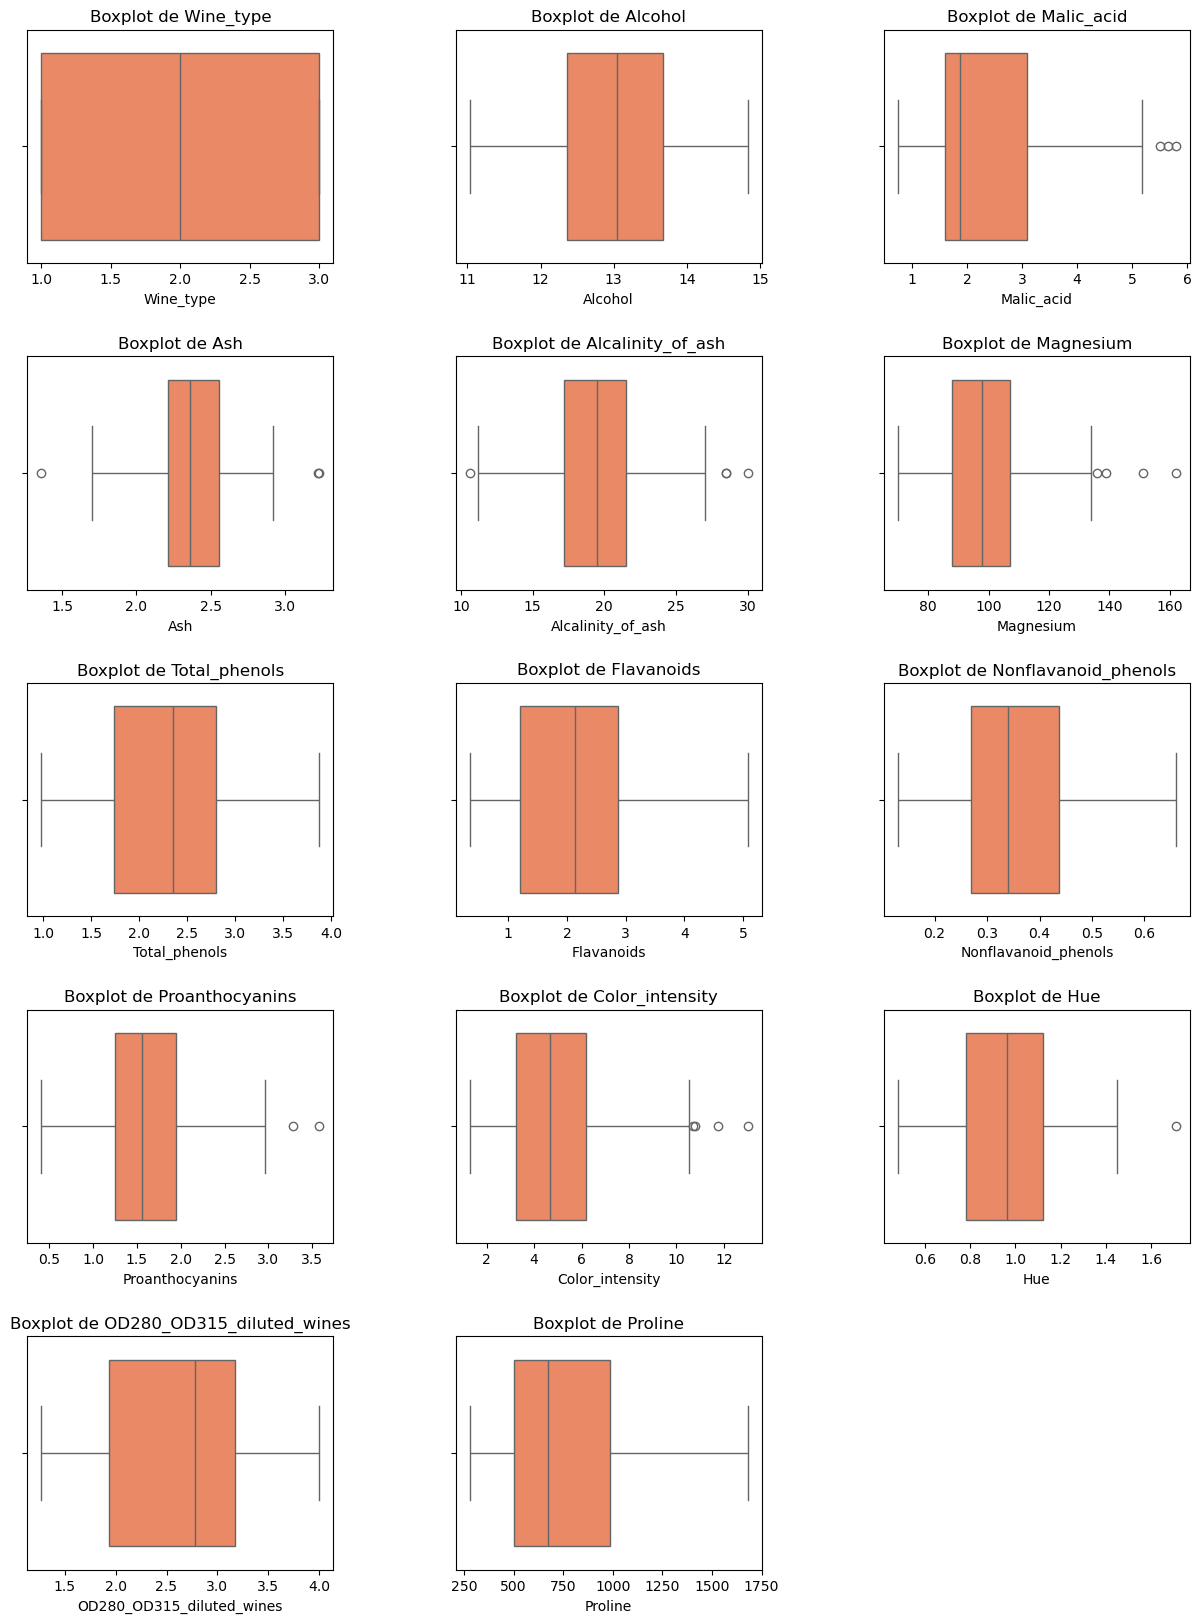

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns  

# Especifiquem el nombre de columnes i files per als subplots
n_cols = 3
n_rows = (len(df_wine.columns) + n_cols - 1) // n_cols  # Correcció

# Creem la figura i els subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))

# Ajustem l'espai entre subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Iterem a través de les variables i crea els gràfics de caixa
for i, col in enumerate(df_wine.columns):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(x=df_wine[col], ax=ax, color="coral")
    ax.set_title(f'Boxplot de {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)

# Eliminem els subplots que no es fan servir si n_cols * n_rows és major que el nombre de variables
for i in range(len(df_wine.columns), n_cols * n_rows):
    fig.delaxes(axes.flatten()[i])

# Mostrem els gràfics
plt.show()

L'anàlisi dels boxplots revela la presència d'alguns valors atípics en diverses variables. En particular, les variables que mostren valors atípics són les següents:

- Àcid màlic: es detecten 3 outliers a la dreta dels valors mitjans.
- Cendra/Ash: s'observa 1 outlier a l'esquerra i 2 a la dreta.
- Alcalinitat de la cendra: es presenta 1 outlier a l'esquerra i 2 a la dreta.
- Magnesi: s'identifiquen 4 outliers a la dreta.
- Proantocianidines: es detecten 2 outliers a la dreta.
- Intensitat del color: s'observen 4 outliers a la dreta.
- Hue/Color: es presenta 1 outlier a la a dreta.

Aquests valors atípics podrien ser d'interès especial en l'anàlisi, ja que podrien indicar observacions excepcionals o errors en les dades. És important tenir en compte aquests valors quan es realitzi l'anàlisi i considerar si cal prendre mesures com la seva eliminació o transformació abans d'aplicar models de classificació.

Ara mirarem la correlació entre les variables, mitjançant un heatmap:

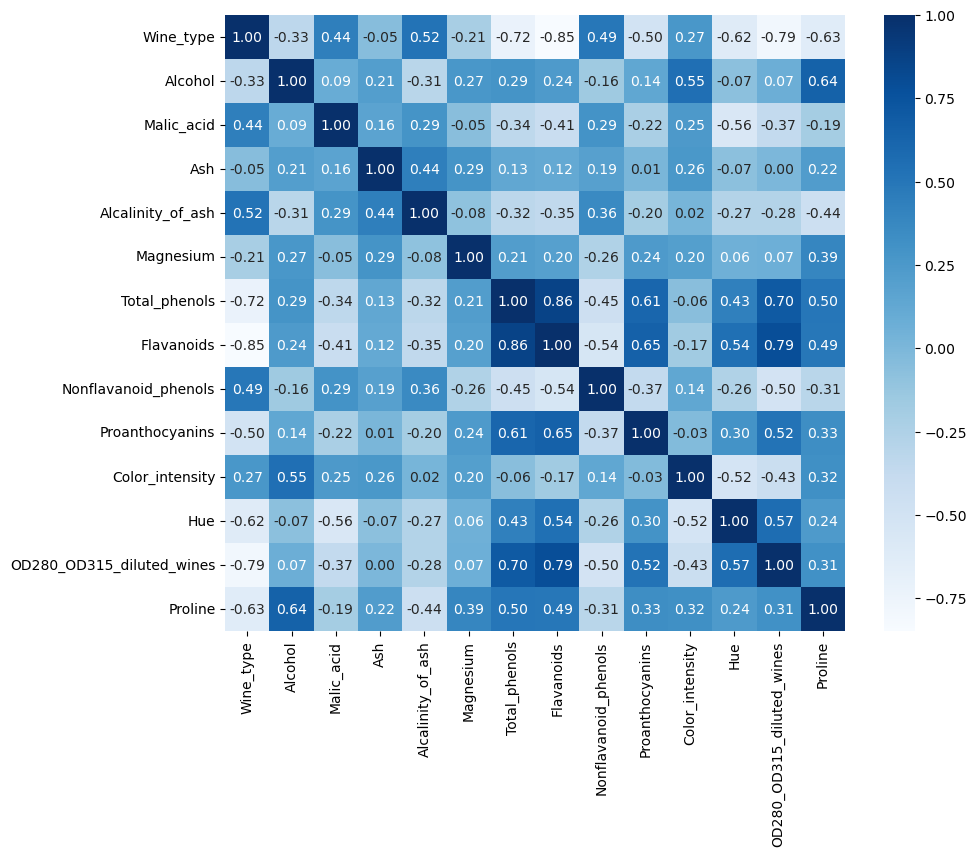

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculem la matriu de correlació.
correlation_matrix = df_wine.corr()

# Creem la figura i el gràfic.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")

# Mostrem el gràfic.
plt.show()

<div style="text-align: justify"> 
El heatmap ens mostra relacions interessants entre les variables. El tipus de vi té una forta correlació negativa amb els flavonoïdes (-0.85) i OD280/OD315 (-0.79), suggerint que aquests components són claus en la diferenciació dels tipus de vi. Hi ha una correlació positiva moderada entre l'alcohol i la proline (0.64) així com la intensitat del color (0.55), indicant que els vins amb majors nivells d'alcohol tendeixen a tenir més proline i més intensitat de color. Els flavonoïdes també mostren una forta correlació positiva amb els fenols totals (0.86) i OD280/OD315 (0.79), destacant la seva importància en les propietats fenòliques i la qualitat del vi. La tonalitat del vi (Hue) té una correlació negativa moderada amb la intensitat de color (-0.52) i correlacions positives moderades amb els flavonoïdes (0.54) i OD280/OD315 (0.57), reflectint com el color i els components fenòlics influeixen en les característiques visuals i qualitatives del vi. Aquestes correlacions mostren com certes característiques químiques estan interrelacionades i poden ser utilitzades per entendre millor la complexitat del vi.
</div>

<div style="text-align: justify"> 
A continuació, abans de crear els diferents models, el que farem és una una estandardització de les dades. Tenint en compte els valors estadístics: escales, rangs i valors atípics de les nostres dades, decidim utilitzar l'Estandardització (Z-score Normalization) per a la normalització. Aquesta decisó es basa en els següents factors:
</div>

- Varietat en l'escala de les dades: el conjunt de dades inclou variables amb una àmplia gamma de valors i desviacions estàndards. Per exemple, la variable Proline varia des de 278 fins a 1680 amb una desviació estàndard considerable, mentre que altres variables com l'Hue tenen rangs molt més petits. L'estandardització farà que totes les variables contribueixin equitativament al model sense que una variable amb un rang més gran domini les altres.

- Sensibilitat als Valors Atípics: com hem pogut veure en els boxplots, tenim valors atípics en el conjunt de dades. L'estandardització Z-Score és generalment més robusta que la normalització Min-Max, ja que aquesta última es pot ser influenciada excessivament per valors atípics, ja que aquests valors determinen els límits mínims i màxims.

- Preparació per a Algoritmes de Clustering: molts algoritmes de clustering, com K-means, assumeixen que les dades estan distribuïdes normalment i són sensibles a l'escala de les característiques. L'estandardització ajuda a satisfer aquesta suposició.


Fem doncs l'estandardització Z-Score:

In [21]:
from sklearn.preprocessing import StandardScaler

# Inicialitzem l'objecte StandardScaler
scaler = StandardScaler()

# Ajustem l'estandarditzador als teus dades i transformem les dades
df_wine_std = scaler.fit_transform(df_wine)

# Convertim les dades estandarditzades en un dataframe amb els noms de les columnes originals
df_wine_std = pd.DataFrame(df_wine_std, columns=df_wine.columns)

Un cop estandarditzades les dades, ja podem passar a crear el nostre model de classificació.

La columna 'Wine_type' és el tipus de vi (1, 2 o 3), que és justament el que volem predir, el nostre target. El que farem és utilitzar aquesta informació a l'hora d'entrenar el model i veure si podem millorar la seva predicció. Els models que utilitzarem són el Random Forest i el Gradient Boosting Machine, ja que s'utilitzen en aprenentatge supervisat, per problemes de classificació de múltiples variables numèriques.

El Random Forest és un model d'assemblatge que es basa en arbres de decisió. Funciona creant molts arbres de decisió (l'arbre és l'algorisme bàsic) i combinant els resultats de tots els arbres. És robust i sol ser menys propens a l'overfitting (ajust exagerat als dades d'entrenament) que els arbres de decisió individuals. És adequat per a molts tipus de problemes de classificació i sol proporcionar resultats fiables.

El Gradient Boosting Machine (GBM) és un altre model d'assemblatge que també es basa en arbres de decisió. Funciona de manera iterativa, millorant gradualment el model en cada iteració. És conegut per ser molt efectiu i pot proporcionar un alt rendiment de classificació. Sol ser més sensible a la configuració dels hiperparàmetres que el Random Forest.

In [22]:
# Importem les llibreries necessàries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Utilitza el conjunt de dades estandarditzades (df_wine_std)
X = df_wine_std.drop('Wine_type', axis=1)  # Excloem la columna 'Wine_type' que conté les etiquetes
y = df_wine['Wine_type']

# Dividim el conjunt de dades estandarditzades en entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creem i entrenem el model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Fem prediccions amb el conjunt de prova
y_pred = rf.predict(X_test)

# Calculem la precisió del model
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisió del model: {accuracy:.2f}")

Precisió del model: 1.00


El resultat indica que la precisió del model és del 100%, fet que pot indicar un sobreajustament. El que podem fer ara és aplicar una validació creuada (cross-validation) per tal d'avaluar la seva capacitat de generalització i evitar el sobreajustament.

In [23]:
from sklearn.model_selection import cross_val_score

# Creem el model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicquem la validació creuada utilitzant el conjunt de dades estandarditzades (X)
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # cv=5 indica que es faran 5 particions de les dades

# Mostrem els resultats de cada partició i la mitjana
print(f"Resultats de la validació creuada: {scores}")
print(f"Mitjana de la precisió: {scores.mean():.2f}")

Resultats de la validació creuada: [0.97222222 0.94444444 0.97222222 0.97142857 1.        ]
Mitjana de la precisió: 0.97


Els resultats de la validació creuada són força bons. Una precisió mitjana de 0.97 (97%) indica que el model Random Forest està funcionant molt bé en el conjunt de dades.

Ara aplicarem un model Gradient Boosting:

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Creem el model Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Apliquem la validació creuada utilitzant el conjunt de dades estandarditzades (X)
scores = cross_val_score(gb, X, y, cv=5, scoring='accuracy')

# Mostrem els resultats de cada partició i la mitjana
print(f"Resultats de la validació creuada: {scores}")
print(f"Mitjana de la precisió: {scores.mean():.2f}")

Resultats de la validació creuada: [0.91666667 0.94444444 0.88888889 0.97142857 0.97142857]
Mitjana de la precisió: 0.94


Els resultats de la validació creuada amb el model Gradient Boosting mostren una precisió mitjana d'aproximadament 
0.94 (o 94%), la qual és una mètrica de rendiment força bona, encara que lleugerament inferior a la que hem obtingut amb el Random Forest (97%). 


# Exercici 2






Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

Ara compararem els dos models mitjançant l'accuracy, la matriu de confusió, la precisió, el recall, l'F1 score i l'AUC-ROC:

In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Dividim les dades en entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenem els models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Fem prediccions
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Calculem les mètriques per a cada model
for model_name, y_pred in [('RandomForest', y_pred_rf), ('GradientBoosting', y_pred_gb)]:
    print(f"Resultats per al {model_name}:")
    print(f"Matriu de Confusió:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Precisió: {precision_score(y_test, y_pred, average='macro'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.2f}")
    print(f"F1 score: {f1_score(y_test, y_pred, average='macro'):.2f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr'):.2f}")


Resultats per al RandomForest:
Matriu de Confusió:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Precisió: 1.00
Recall: 1.00
F1 score: 1.00
AUC-ROC: 1.00
Resultats per al GradientBoosting:
Matriu de Confusió:
[[14  0  0]
 [ 1 13  0]
 [ 0  1  7]]
Precisió: 0.95
Recall: 0.93
F1 score: 0.94
AUC-ROC: 1.00


Ara anem a analitzar els resultats obtinguts. Pel RandomForest els resultats són els següents:

- Matriu de Confusió: el model ha predit totes les classes correctament sense errors.
- Precisió: totes les prediccions positives són correctes.
- Recall: el model ha identificat correctament totes les instàncies positives.
- F1 score: puntuació excel.lent, mostrant un equilibri perfecte entre precisió i recall.
- AUC-ROC: indica una distinció perfecta entre classes.

Ara pel GradientBoosting:

- Matriu de Confusió: Hi ha un petit nombre d'errors (1 fals positiu i 1 fals negatiu).
- Precisió: força alta (0.95), però no perfecta a causa dels errors mencionats.
- Recall: mostra que la majoria de les instàncies positives s'han identificat correctament, però no totes (0.93)
- Puntuació F1: alta (0.94) però lleugerament inferior a la del RandomForest a causa dels errors en la precisió i la recobrada.
- AUC-ROC: indica una excel·lent capacitat de diferenciar entre les classes.

Així doncs, el model RandomForest està funcionant de manera excepcional amb el conjunt de dades, assolint puntuacions perfectes en totes les mètriques. Això indica que el model s'ha ajustat molt bé a les dades que tenim, però també podria indicar, com hem comentat abans, un possible sobreajustament. El model Gradient Boosting també està funcionant molt bé, però amb un petit marge d'error. Això podria indicar que el model està generalitzant una mica millor que el Random Forest, encara que amb un rendiment lleugerament inferior.

En conclusió, mentre que el RandomForest està donant resultats perfectes en aquest conjunt de dades, pot ser útil provar amb conjunts de dades més grans o més variats per a veure si aquests resultats es mantenen. El Gradient Boosting, tot i no ser perfecte, podria oferir una millor generalització en situacions diferents.

# Exercici 3






Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

Els paràmetres que podem modificar per tal de millorar la predicció dels models són els següents:

Pel Random Forest:

- n_estimators: Nombre d'arbres en el bosc. Més arbres poden millorar el rendiment, però també augmenten el temps de càlcul.
- max_depth: Profunditat màxima dels arbres. Una major profunditat pot capturar més informació, però també pot conduir a sobreajustament.
- min_samples_split: Nombre mínim de mostres necessàries per dividir un node.
- min_samples_leaf: Nombre mínim de mostres necessàries en una fulla.
- max_features: Nombre de característiques a considerar quan es busca la millor divisió.

Pel Gradient Boosting:

- n_estimators: Nombre de fases de boosting a realitzar. Més fases poden millorar el rendiment, però també poden conduir a sobreajustament.
- learning_rate: Taxa d'aprenentatge. Reduir-la pot millorar el rendiment, però requereix més estimadors.
- max_depth: Profunditat màxima dels arbres.
- min_samples_split i min_samples_leaf.
- subsample: Fracció de mostres a utilitzar per ajustar els arbres individuals.

El que farem és utilitzar GridSearchCV de Scikit-learn per a buscar automàticament la millor combinació de paràmetres, en comptes de fer-ho manualment. 

Comencem buscant els millors paràmetres pel Random Forest:

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Paràmetres a provar en la cerca en quadrícula
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] 
}

# Creació del model i GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Entrenament utilitzant la cerca en quadrícula
grid_search_rf.fit(X_train, y_train)

# Millors paràmetres
print(grid_search_rf.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Anem a interpretar els resultats obtinguts pel Random Forest. Segons la mètrica escollida (Accuracy) els millors paràmetres són:

- max_depth: None - No hi ha una profunditat màxima per als arbres, el que significa que els arbres poden créixer tant com sigui necessari per minimitzar l'error dins de cada node, sempre que els altres criteris d'aturada no s'activin.

- max_features: 'sqrt' - El nombre de característiques a considerar quan es busca la millor divisió en cada node és l'arrel quadrada del nombre total de característiques. Aquesta és una pràctica comuna per evitar que un petit grup de característiques molt predictives domini l'aprenentatge.

- min_samples_leaf: 1 - Cada fulla (node final) de l'arbre ha de tenir almenys una mostra. Això permet que l'arbre sigui tan detallat com sigui possible, tot i que pot augmentar el risc de sobreajustament.

- min_samples_split: 2 - Un node es dividirà en dos nodes fills només si conté almenys dues mostres. Aquest és el valor mínim i permet que els arbres creixin lliurement.

- n_estimators: 100 - El model utilitza 100 arbres individuals. Aquesta és una quantitat moderada d'arbres i generalment proporciona un bon equilibri entre temps de càlcul i rendiment del model.


Ara busquem els millors paràmetres pel Gradient Boosting:

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Paràmetres a provar en la cerca en quadrícula per al Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Creació del model i GridSearchCV
gb = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Entrenament utilitzant la cerca en quadrícula
grid_search_gb.fit(X_train, y_train)

# Millors paràmetres
print(grid_search_gb.best_params_)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}


Ara interpretarem els resultats pel Gradient Boosting. Segons la mètrica escollida (Accuracy) els millors paràmetres són:

- learning_rate: 0.2 - Aquest és un valor relativament alt per a la taxa d'aprenentatge, el que indica que cada arbre successiu contribueix més a la correcció dels errors fets pels arbres anteriors. Una taxa d'aprenentatge més alta pot accelerar el procés d'entrenament, però també pot portar a un sobreajustament si no es controla amb altres paràmetres.

- max_depth: 4 - Això limita la profunditat màxima de cada arbre a 3 nivells. Una profunditat major pot capturar relacions més complexes, però també incrementa el risc de sobreajustament. Una profunditat de 3 és un equilibri entre la modelització de relacions complexes i la prevenció de l'aprenentatge de soroll dels dades.

- min_samples_leaf: 4 - Cada fulla (o node final) de l'arbre ha de tenir almenys 4 mostres. Això ajuda a suavitzar el model, evitant regles excessivament específiques que podrien ser resultats de soroll en els dades.

- min_samples_split: 2 - Aquest és el nombre mínim de mostres requerides per dividir un node. Un valor de 2 permet que el model es divideixi lliurement, però pot portar a una gran quantitat de divisions, potencialment sobreajustant-se.

- n_estimators: 100 - El model utilitza 100 arbres. Aquesta és una quantitat moderada d'arbres, proporcionant un bon equilibri entre temps de càlcul i capacitat de modelització.

- subsample: 0.8 - Aquest paràmetre està relacionat amb la tècnica de 'Stochastic Gradient Boosting', on cada arbre individual és entrenat en un subconjunt aleatori del 80% de les dades d'entrenament. Això ajuda a prevenir el sobreajustament i pot millorar la generalització.

# Exercici 4






Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

Ara utilitzarem els millors paràmetres obtinguts per veure el seu rendiment a partir d'un train/test. 

In [28]:
from sklearn.model_selection import train_test_split

X = df_wine_std.drop('Wine_type', axis=1)  # Eliminem la columna objectiu per a obtenir les característiques
y = df_wine['Wine_type']  # La nostra variable objectiu

# Ara dividim les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Entrenament i avaluació amb Train/Test
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Millors paràmetres dels models
rf_best_params = {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
gb_best_params = {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}

# Inicialització dels models amb els millors paràmetres
rf = RandomForestClassifier(**rf_best_params, random_state=42)
gb = GradientBoostingClassifier(**gb_best_params, random_state=42)

# Entrenament dels models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Predicció i avaluació
for model in [rf, gb]:
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")

Model: RandomForestClassifier
Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Model: GradientBoostingClassifier
Accuracy: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00 

In [36]:
# Validació creuada
from sklearn.model_selection import cross_val_score

# Realització de la validació creuada amb les dades estandaritzades
scores_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
scores_gb = cross_val_score(gb, X, y, cv=5, scoring='accuracy')

# Mostrem els resultats
print(f"Random Forest CV Accuracy: {scores_rf.mean():.2f} +/- {scores_rf.std():.2f}")
print(f"Gradient Boosting CV Accuracy: {scores_gb.mean():.2f} +/- {scores_gb.std():.2f}")

Random Forest CV Accuracy: 0.97 +/- 0.02
Gradient Boosting CV Accuracy: 0.97 +/- 0.03


Els resultats obtinguts del Train/Test Split indiquen que tant el model de Random Forest com el de Gradient Boosting han assolit una precisió perfecta de 1.0 en el conjunt de prova, classificant correctament totes les 54 mostres, tal com reflecteixen les respectives matrius de confusió i informes de classificació. Tot i això, aquesta precisió pot ser enganyosa, ja que la mida del conjunt de prova és relativament petita i podria no capturar tota la varietat de casos que els models podrien trobar en un context més ampli. 

Per contra, la validació creuada amb 5 folds mostra una precisió mitjana de 0.97 amb una desviació estàndard de 0.02 per al Random Forest i 0.03 per al Gradient Boosting, el que suggereix que mentre els models tenen un rendiment destacat, no són infal·libles i presenten una variació en la seva capacitat predictiva. Aquesta lleugera disminució en la precisió mitjançant la validació creuada pot indicar un potencial sobreajustament, ja que els models poden estar aprenent detalls específics del conjunt d'entrenament que no generalitzen bé. Aquestes dades ens insten a ser cautelosos en la nostra interpretació dels resultats i a considerar l'ús de més dades o l'ajustament dels paràmetres del model per millorar la generalització i la robustesa dels models en aplicacions reals.

# Exercici 5


Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

Com ja hem aplicat un procés d'estandardització prèviament, el que farem ara per intentar millorar els resultats és tractar els outliers que tenim en algunes de les variables. El que farem és substituir els valors atípics per la mitjana dels valors (decidim aplicar la mitjana en comptes d'eliminar-los per tal de no perdre informació).

L'eliminació d'outliers es realitza generalment per les següents raons:

- Millora la precisió del model: els outliers poden distorsionar els models estadístics i d'aprenentatge automàtic, de manera que l'eliminació d'aquestes observacions pot millorar la precisió del model.

- Redueix l'impacte del soroll: les observacions atípiques sovint es consideren soroll en les dades i poden introduir errors innecessaris en els models.

- Facilita la interpretació: en alguns casos, els outliers poden dificultar la interpretació dels resultats. Eliminar-los pot fer que els resultats siguin més comprensibles.

Identificarem els outliers amb la tècnica IQR (Rang interquartílic). Utilitzarem els valors del dataframe ja normalitzats.

In [31]:
# Visualitzem el dataframe amb les dades normalitzades (excepte 1a columna)
df_wine_std.iloc[:, 1:].head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [32]:
import numpy as np

# Creem una llista de variables amb els valors atípics que volem identificar
variables_amb_outliers = ['Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Proanthocyanins', 'Color_intensity', 'Hue']

# Establim el valor de k per a la identificació d'outliers
k = 1.5

# Iterem a través de les variables de la llista i calculem els outliers per a cadascuna
for variable in variables_amb_outliers:
    # Selecciona la variable de interés
    variable_interes = df_wine_std[variable]

    # Calculem Q1 y Q3
    Q1 = np.percentile(variable_interes, 25)
    Q3 = np.percentile(variable_interes, 75)

    # Calculem l'IQR
    IQR = Q3 - Q1

    # Definim els límits per a identificar outliers
    lower_limit = Q1 - k * IQR
    upper_limit = Q3 + k * IQR

    # Identifiquem els outliers
    outliers = variable_interes[(variable_interes < lower_limit) | (variable_interes > upper_limit)]

    # Mostrem els outliers per a la variable actual
    print(f"Valors atípics per a {variable}:")
    print(outliers)
    print()


Valors atípics per a Malic_acid:
123    3.109192
137    2.848870
173    2.974543
Name: Malic_acid, dtype: float64

Valors atípics per a Ash:
25     3.119772
59    -3.679162
121    3.156325
Name: Ash, dtype: float64

Valors atípics per a Alcalinity_of_ash:
59    -2.671018
73     3.154511
121    2.704083
127    2.704083
Name: Alcalinity_of_ash, dtype: float64

Valors atípics per a Magnesium:
69    3.599025
73    2.756465
78    2.545825
95    4.371372
Name: Magnesium, dtype: float64

Valors atípics per a Proanthocyanins:
95     2.959447
110    3.485073
Name: Proanthocyanins, dtype: float64

Valors atípics per a Color_intensity:
151    2.483778
158    3.435432
159    2.894719
166    2.431870
Name: Color_intensity, dtype: float64

Valors atípics per a Hue:
115    3.301694
Name: Hue, dtype: float64



Ara substituirem els valors d'aquests outliers per la mitjana.

In [33]:
# Llista de variables amb outliers
variables_amb_outliers = ['Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Proanthocyanins', 'Color_intensity', 'Hue']

# Valor de k per identificar els outliers
k = 1.5

# Itera a través de les variables i substitueix els outliers per la mitjana
for variable in variables_amb_outliers:
    Q1 = np.percentile(df_wine_std[variable], 25)
    Q3 = np.percentile(df_wine_std[variable], 75)
    IQR = Q3 - Q1
    límit_inferior = Q1 - k * IQR
    límit_superior = Q3 + k * IQR
    
    # Calcula la mitjana de la variable
    valor_mitjà = df_wine_std[variable].mean()
    
    # Substitueix els outliers amb la mitjana
    df_wine_std.loc[df_wine_std[variable] < límit_inferior, variable] = valor_mitjà
    df_wine_std.loc[df_wine_std[variable] > límit_superior, variable] = valor_mitjà

Ara reentrenem el model un cop eliminats els outliers:

In [37]:
from sklearn.model_selection import train_test_split

X = df_wine_std.drop('Wine_type', axis=1)
y = df_wine['Wine_type']

# Dividim les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# La variable 'X_train' ara està escalada i es pot assignar a 'X_train_scaled'
X_train_scaled = X_train

# Reentrenem els models
rf_best_params = {'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 2} # Canvia això pels teus propis paràmetres
gb_best_params = {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 3} # Canvia això pels teus propis paràmetres

# Reentrenem el RandomForestClassifier
rf = RandomForestClassifier(**rf_best_params, random_state=42)
rf.fit(X_train_scaled, y_train)

# Reentrenem el GradientBoostingClassifier
gb = GradientBoostingClassifier(**gb_best_params, random_state=42)
gb.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

I ara avaluem els models reentrenats:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Separació de característiques i etiquetes
X = df_wine.drop('Wine_type', axis=1)  # Eliminar la columna d'etiquetes del conjunt de dades
y = df_wine['Wine_type']  # Utilitzar la columna 'Wine_type' com a etiquetes

# Divisió de les dades en conjunts d'entrenament i de prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalat de les dades d'entrenament
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Millors paràmetres per al RandomForestClassifier
rf_best_params = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Millors paràmetres per al GradientBoostingClassifier
gb_best_params = {
    'learning_rate': 0.2,
    'max_depth': 3,
    'min_samples_leaf': 4,
    'min_samples_split': 2,
    'n_estimators': 100,
    'subsample': 0.8
}

# Entrenament del RandomForestClassifier amb els millors paràmetres
rf = RandomForestClassifier(**rf_best_params, random_state=42)
rf.fit(X_train_scaled, y_train)

# Entrenament del GradientBoostingClassifier amb els millors paràmetres
gb = GradientBoostingClassifier(**gb_best_params, random_state=42)
gb.fit(X_train_scaled, y_train)

# Escalat de les dades de prova
X_test_scaled = scaler.transform(X_test)

# Avaluació del RandomForestClassifier
y_pred_rf = rf.predict(X_test_scaled)
print("RandomForestClassifier amb Dades Escalades:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}\n")

# Avaluació del GradientBoostingClassifier
y_pred_gb = gb.predict(X_test_scaled)
print("GradientBoostingClassifier amb Dades Escalades:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_gb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_gb)}\n")

RandomForestClassifier amb Dades Escalades:
Accuracy: 1.0
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


GradientBoostingClassifier amb Dades Escalades:
Accuracy: 1.0
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg    

Ara tornem a fer una validació creuada, ja que estem treballant amb dades noves (sense outliers).

In [41]:
# Escalat de totes les dades (no només les d'entrenament)
X_scaled = scaler.fit_transform(X)

# Validació creuada per al RandomForestClassifier
rf_cv_scores = cross_val_score(RandomForestClassifier(**rf_best_params, random_state=42), 
                               X_scaled, y, cv=5)  # cv=5 indica que s'utilitzen 5 particions

# Validació creuada per al GradientBoostingClassifier
gb_cv_scores = cross_val_score(GradientBoostingClassifier(**gb_best_params, random_state=42), 
                               X_scaled, y, cv=5)  # cv=5 indica que s'utilitzen 5 particions

# Mostrar els resultats
print("RandomForestClassifier - Validació Creuada:")
print(f"Precisió mitjana: {rf_cv_scores.mean()}")
print(f"Desviació estàndard: {rf_cv_scores.std()}\n")

print("GradientBoostingClassifier - Validació Creuada:")
print(f"Precisió mitjana: {gb_cv_scores.mean()}")
print(f"Desviació estàndard: {gb_cv_scores.std()}\n")

RandomForestClassifier - Validació Creuada:
Precisió mitjana: 0.9720634920634922
Desviació estàndard: 0.017571077268107502

GradientBoostingClassifier - Validació Creuada:
Precisió mitjana: 0.9665079365079364
Desviació estàndard: 0.032368500562618134



<b>Anàlisi dels Resultats</b>

Els models RandomForestClassifier i GradientBoostingClassifier han demostrat ser extraordinàriament eficaços en el conjunt de prova, assolint una precisió perfecta de 1.0. Això indica que han estat capaços de classificar correctament totes les instàncies d'aquest conjunt específic sense cap error, una fita remarcable que mostra la seva capacitat per capturar amb precisió les relacions entre les característiques i les etiquetes en les dades provades.

No obstant això, quan considerem els resultats de la validació creuada, veiem un panorama més nuançat. El RandomForestClassifier ha assolit una precisió mitjana de 0.972 amb una desviació estàndard de 0.018, mentre que el GradientBoostingClassifier ha registrat una precisió mitjana de 0.967 amb una desviació estàndard de 0.032. Aquests resultats indiquen que, tot i que els models tenen un excel·lent rendiment en el conjunt de prova, la seva capacitat de generalització, quan s'enfronten a dades noves i variades, és lleugerament inferior, però encara molt alta. La desviació estàndard relativament baixa del RandomForestClassifier en comparació amb el GradientBoostingClassifier suggereix una major consistència en el rendiment d'aquest model a través de diferents subconjunts de dades.

La combinació d'una precisió perfecta en el conjunt de prova i una alta precisió en la validació creuada reforça la confiança en la qualitat dels models. No obstant això, la presència d'una precisió lleugerament menor en la validació creuada serveix com a recordatori important de la necessitat de prudència. És vital considerar la possibilitat de sobreajustament i l'importància d'ajustar i millorar contínuament els models per assegurar-se que no només s'ajusten bé al conjunt de dades actual, sinó que també són capaços d'adaptar-se eficaçment a noves dades.

En resum, tant el RandomForest com el GradientBoosting han demostrat ser models fiables i robustos per a aquest conjunt de dades, oferint un rendiment destacat tant en el conjunt de prova com en la validació creuada. Aquests resultats són indicatius de la seva forta capacitat predictiva i de la seva utilitat potencial en aplicacions reals, tot mantenint una actitud de vigilància i millora contínua.